In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## World line of twins -- accelerated observers ##

In class we showed that the world line of an observer undergoing constant acceleration is a hyperbola $(t-t_0)^2-(x-x_0)^2 = $const or, with an appropriate choice of origin
$$
  x=\frac{c^2}{g}\cosh\frac{g\tau}{c} \quad , \quad  t=\frac{c}{g}\sinh\frac{g\tau}{c}
$$
with $g$ the acceleration measured by the observer in their frame and $\tau$ the proper time (i.e. the time measured by the observer in their frame).  Note it follows immediately that $v/c = \tanh(g\tau/c)$ and so the rapidity is just $g\tau/c$.

First let's just look at this worldline:

Text(0, 0.5, '$v/c$')

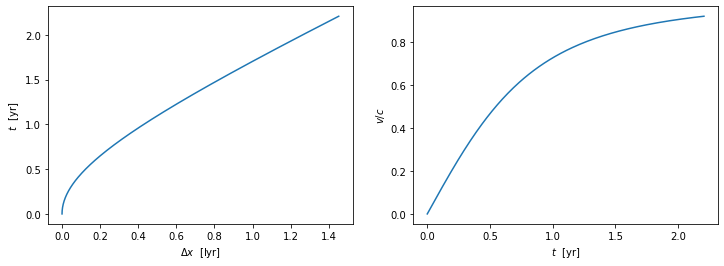

In [2]:
gg = 10.0       # acceleration in m/s^2
cc = 2.997e8    # speed of light in m/s
yr = 3.156e7    # year in s.
lyr= cc*yr      # light year in m
#
tau = np.linspace(0,1.5*yr,250)
zeta= gg*tau/cc
xx  = cc**2/gg*np.cosh(zeta)
tt  =    cc/gg*np.sinh(zeta)
vv  = cc*np.tanh(zeta)
#
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot((xx-xx[0])/lyr,tt/yr)
ax[0].set_xlabel(r'$\Delta x$  [lyr]')
ax[0].set_ylabel(r'$t$  [yr]')
#
ax[1].plot(tt/yr,vv/cc)
ax[1].set_xlabel(r'$t$  [yr]')
ax[1].set_ylabel(r'$v/c$')

In [3]:
# We can compute the proper time elapsed as the length
# along the worldline just as a sanity check:
#
gamma  = 1.0/np.sqrt(1-(vv/cc)**2)
length = np.trapz(1.0/gamma,x=tt)
print("Length={:.1f} at tau={:.1f}".format(length,tau[-1]))
#
# This isn't bad for such a crude numerical integration:

Length=47340040.6 at tau=47340000.0


## Out and back again ##

So this is the worldline of one of our twins.  We can start putting together translated and flipped versions of this worldline to get our twin to decelerate, turn around and come back again.  Let's see how this comes about.

If we started at rest, the worldline of a decelerating observer is just $x=-(c^2/g)\cosh(-g\tau/c)$ and $t=(c/g)\sin(g\tau/c)$.  But we actually start moving at $v=c\tanh\zeta_1$ where $\zeta_1=g\tau_1/c$ and $\tau_1$ is the proper time at the end of the acceleration period.  However we know that in order to boost from one frame to another we simply add the rapidities (which we can also just prove directly by Lorentz transforming the $(t,x)$ pair between frames and using hyperbolic trig identities).  Ignoring the location of the origin for now, this means e.g. $x=-(c^2/g)\cosh(\zeta_1-g[\tau-\tau_1]/c)$ and similarly for $t$.  But for $\tau$ running from $\tau_1$ to $2\tau_1$ the argument of the $\cosh$ or $\sinh$ just runs from $\zeta_1$ down to $0$, i.e. the worline is just the "flipped" version of the accelerating worldline.

Let's do this:

In [4]:
# Flip the worldline
tflip = 2*tt[-1] - tt[::-1]
xflip = 2*xx[-1] - xx[::-1]
vflip = vv[::-1]
# and append it to our outgoing leg -- dropping the first point.
tau= np.append(tau,(tau+tau[-1])[1:])
tt = np.append(tt,tflip[1:])
xx = np.append(xx,xflip[1:])
vv = np.append(vv,vflip[1:])

Text(0, 0.5, '$v/c$')

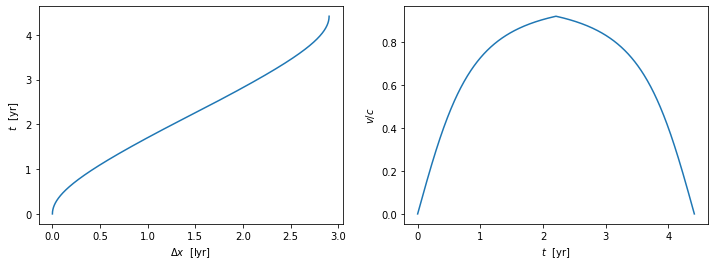

In [5]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot((xx-xx[0])/lyr,tt/yr)
ax[0].set_xlabel(r'$\Delta x$  [lyr]')
ax[0].set_ylabel(r'$t$  [yr]')
#
ax[1].plot(tt/yr,vv/cc)
ax[1].set_xlabel(r'$t$  [yr]')
ax[1].set_ylabel(r'$v/c$')

In [6]:
#
# And finally we can do the return journey using the same tricks:
#
tback = tt[-1] + tt
xback = xx[-1] - (xx-xx[0])
vback = -vv
# and append it to our outgoing leg.
tau= np.append(tau,(tau+tau[-1]))
tt = np.append(tt,tback)
xx = np.append(xx,xback)
vv = np.append(vv,vback)

Text(0, 0.5, '$v/c$')

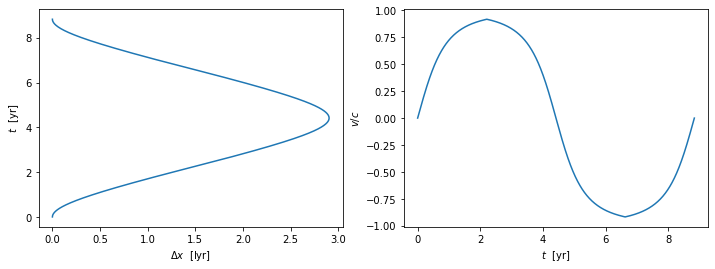

In [7]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot((xx-xx[0])/lyr,tt/yr)
ax[0].set_xlabel(r'$\Delta x$  [lyr]')
ax[0].set_ylabel(r'$t$  [yr]')
#
ax[1].plot(tt/yr,vv/cc)
ax[1].set_xlabel(r'$t$  [yr]')
ax[1].set_ylabel(r'$v/c$')

In [8]:
# Compare the age of the rocket-bound and Earth-bound twin at the end of this:
print("Time at tau={:.1f} is {:.1f}".format(tau[-1],tt[-1]))
print("Age ratio is {:f}".format(tt[-1]/tau[-1]))

Time at tau=189360000.0 is 278532393.1
Age ratio is 1.470915


### Signal reception ###

Suppose the twin in the rocket is broadcasting a signal of $1$GHz continuously during their trip.  What does the frequency look like to the Earth-bound twin?

There are two effects we need to deal with.  The first is the Doppler shift due to the moving transmitter: this changes the frequency by a factor of $\sqrt{(1-[v/c])/(1+[v/c])}$.  The second factor is the light travel time for the signal to reach the Earth-bound twin. 


In [9]:
nu_em = 1.0e9
nu_rec= nu_em * np.sqrt( (1-vv/cc)/(1+vv/cc) )
tt_rec= tt + xx/cc

Text(0.5, 0, '$t_{rec}$  [yr]')

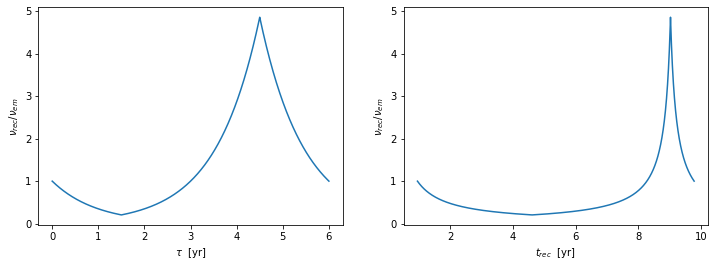

In [10]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(tau/yr,nu_rec/nu_em)
ax[0].set_ylabel(r'$\nu_{rec}/\nu_{em}$')
ax[0].set_xlabel(r'$\tau$  [yr]')
#
ax[1].plot(tt_rec/yr,nu_rec/nu_em)
ax[1].set_ylabel(r'$\nu_{rec}/\nu_{em}$')
ax[1].set_xlabel(r'$t_{rec}$  [yr]')

Note how the fact that the signal takes longer and longer to reach us changes the shape of the curve significantly!

## Sinusoidal acceleration ##

Let's consider a more general case where $g$ is not constant, but is controlled by the rocketeer.  Suppose $g(\tau)$ is a given, externally supplied function.  We have 3 simultaneous equations that we need to solve to describe the worldline:
$$
  u_\mu u^\mu = 1 \quad , \quad
  a_\mu a^\mu = -g^2(\tau) \quad , \quad
  u_\mu a^\mu = 0
$$
where we have chosen the metric sign convention $u_\mu u^\mu = (u^t)^2-(u^x)^2$ and we'll switch to "natural" units with $c=1$.

It is easy to see that these three equations are satisfied by $a^t=g(\tau)u^x$ and $a^x=g(\tau)u^t$ or
$$
  \frac{du^t}{d\tau} = g(\tau) u^x \quad , \quad
  \frac{du^x}{d\tau} = g(\tau) u^t
$$
Let's solve these numerically (so we can later put in any $g(\tau)$ we want) starting from initial conditions $(t,x)=(0,0)$ and $(u^t,u^x)=(1,0)$.

We can choose any function we like for $g(\tau)$.  For example $g(\tau)=g_0\cos\kappa \tau$ will smoothly approximate our out-and-back-again trajectory above.  We can also choose to "clip" the acceleration using something like $g(\tau)=g_0\tanh(g_1\cos\kappa\tau)$.  This looks more like regions of constant acceleration, with smooth transitions between them.  Or you could just fit a spline through a set of points.

In [11]:
def goftau(tau):
    """Our assumed (rest-frame) acceleration profile, in natural units."""
    g0,g1 = 1.5,2.5
    kap   = 1.0
    g     = g0 * np.tanh(g1 * np.cos(kap*tau))
    return(g)

Text(0, 0.5, '$g(\\tau)$')

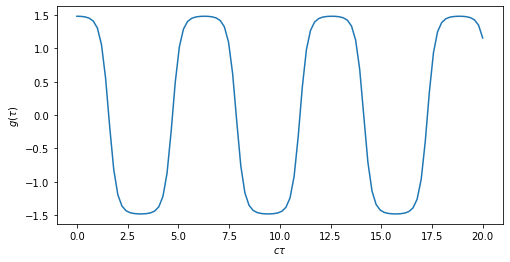

In [12]:
fig,ax = plt.subplots(1,1,figsize=(8,4))
tau = np.linspace(0,20,100)
ax.plot(tau,goftau(tau))
ax.set_xlabel(r'$c\tau$')
ax.set_ylabel(r'$g(\tau)$')

In [13]:
from scipy.integrate import solve_ivp
#
def derivs(tau,y):
    """Pack "y" as (t,x,u^t,u^x).  Using natural units."""
    g     = goftau(tau)
    dy    = np.zeros_like(y)
    dy[0] =   y[2]  # dt
    dy[1] =   y[3]  # dx
    dy[2] = g*y[3]  # du^t
    dy[3] = g*y[2]  # du^x
    return(dy)
#
tau_start,tau_end,Nout = 0.0,20.0,100
y0   = np.array([0.0,0.0,1.0,0.0])
tout = np.linspace(tau_start,tau_end,Nout)
res  = solve_ivp(derivs,(tau_start,tau_end),y0,t_eval=tout)

Age ratio is 1.947018


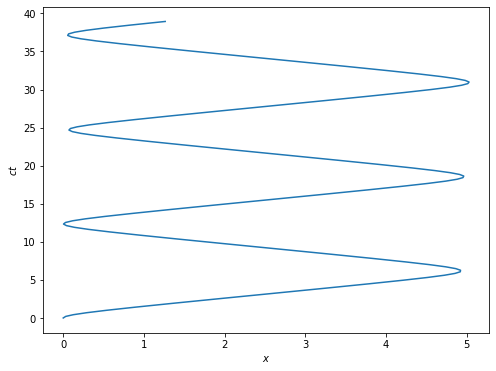

In [14]:
# Plot the worldline.
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(res.y[1,:],res.y[0,:])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$ct$')
#
print("Age ratio is {:f}".format(res.y[0,-1]/tau_end))

We can get the velocity of the object, as measured in our coordinate frame, directly from our solution.  Recall $dx/dt=(dx/d\tau)/(dt/d\tau)=u^x/u^t$.  Similarly $\gamma=u^t$.

Text(0, 0.5, '$v/c$')

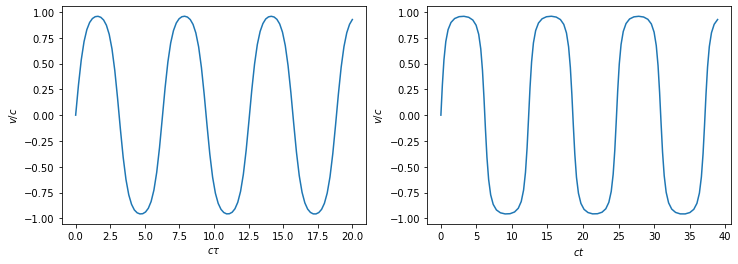

In [15]:
# Plot the velocity profiles.
fig,ax = plt.subplots(1,2,figsize=(12,4))
vv = res.y[3,:]/res.y[2,:]
ax[0].plot(tout,vv)
ax[0].set_xlabel(r'$c\tau$')
ax[0].set_ylabel(r'$v/c$')
#
ax[1].plot(res.y[0,:],vv)
ax[1].set_xlabel(r'$ct$')
ax[1].set_ylabel(r'$v/c$')

Given this world line you can look at how much proper time is elapsed, how the frequency of emitted radiation would change, and so on.